In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
def show_state(env, episode,step, info=""):
    plt.figure(99999,figsize=[8,6])
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("episode: {} step: {} ".format(episode,step))
    #plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [5]:
import gym

In [6]:
import time

In [7]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [8]:
env = gym.make('Taxi-v3')

In [9]:
number_of_states=env.observation_space.n
number_of_actions=env.action_space.n

In [10]:
Q=torch.zeros([number_of_states,number_of_actions])

In [11]:
gamma=1.0

In [12]:
%%time
#env = gym.make('FrozenLake-v0')

num_episodes=1000

steps_total=np.full([num_episodes],-999,dtype=np.int32)
rewards_total=np.full([num_episodes],-999,dtype=np.float32)
for i_episode in range(num_episodes):
    
    state = env.reset()
    #for step in range(100):
    step=0
    #print("____INITIAL STATE____")
    #env.render()
    #print("^^^^^^^^^^^^^^^^^^^^^")
    while True:
        
        step+=1
        
        #action=env.action_space.sample()
        Q_eps=0.001*torch.randn([number_of_actions])
        action=torch.argmax(Q[state]+Q_eps).item()
        new_state, reward, done, info = env.step(action)
        
        Q[state,action]=reward+gamma *torch.max(Q[new_state]).item()
        
        state=new_state
        
        #time.sleep(0.4)
        #print("------------------------")
        #env.render() 
        #print("++++++++++++++++++++++++")
        #print('new state: ',new_state)
        #print('info: ', info)
        
        #show_state(env.env,i_episode,step)
        
        if done:
            steps_total[i_episode]=step
            rewards_total[i_episode]=reward
            print("Episode finished after: {}".format(step))
            break
        

Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 189
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 135
Episode finished after: 200
Episode finished after: 200
Episode finished after: 103
Episode finished after: 157
Episode finished after: 200
Episode finished after: 173
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 80
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 159
Episode finished after: 129
Episode finished after: 198
Episode finished after: 200
Episode finished after: 200
Episode finished after: 169
Episode finished after: 200
Episode finished after: 87
Episode finished after

Episode finished after: 56
Episode finished after: 14
Episode finished after: 13
Episode finished after: 20
Episode finished after: 11
Episode finished after: 18
Episode finished after: 16
Episode finished after: 12
Episode finished after: 10
Episode finished after: 11
Episode finished after: 22
Episode finished after: 19
Episode finished after: 27
Episode finished after: 14
Episode finished after: 12
Episode finished after: 15
Episode finished after: 11
Episode finished after: 16
Episode finished after: 15
Episode finished after: 15
Episode finished after: 16
Episode finished after: 16
Episode finished after: 14
Episode finished after: 15
Episode finished after: 13
Episode finished after: 12
Episode finished after: 16
Episode finished after: 9
Episode finished after: 12
Episode finished after: 20
Episode finished after: 33
Episode finished after: 14
Episode finished after: 18
Episode finished after: 15
Episode finished after: 12
Episode finished after: 11
Episode finished after: 8
Epi

Episode finished after: 16
Episode finished after: 12
Episode finished after: 13
Episode finished after: 12
Episode finished after: 9
Episode finished after: 15
Episode finished after: 13
Episode finished after: 13
Episode finished after: 13
Episode finished after: 23
Episode finished after: 12
Episode finished after: 18
Episode finished after: 13
Episode finished after: 12
Episode finished after: 15
Episode finished after: 16
Episode finished after: 15
Episode finished after: 17
Episode finished after: 12
Episode finished after: 16
Episode finished after: 18
Episode finished after: 9
Episode finished after: 17
Episode finished after: 12
Episode finished after: 17
Episode finished after: 13
Episode finished after: 16
Episode finished after: 17
Episode finished after: 8
Episode finished after: 16
Episode finished after: 12
Episode finished after: 14
Episode finished after: 9
Episode finished after: 11
Episode finished after: 17
Episode finished after: 11
Episode finished after: 16
Episo

In [13]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 28.453


In [14]:
print("Average number of steps in last 100 episodes: {}". format(np.average(steps_total[-100:])))

Average number of steps in last 100 episodes: 13.69


In [15]:
print("Fraction of episodes finished succesfully {}".format(np.average(rewards_total)))

Fraction of episodes finished succesfully 19.166000366210938


In [16]:
print("Fraction of episodes finished succesfully in last 100 episodes {}".format(np.average(rewards_total[-100:])))

Fraction of episodes finished succesfully in last 100 episodes 20.0


In [17]:
print(Q)

tensor([[  0.,   0.,   0.,   0.,   0.,   0.],
        [ -7.,  -8.,  -8.,  -7.,  11., -10.],
        [ -5.,  -4.,  -4.,  -4.,  15., -10.],
        ...,
        [ -4.,  -3.,  -4.,  -4., -10., -10.],
        [ -8.,  -8.,  -8.,  -8., -10., -10.],
        [ -1.,  -2.,  -1.,  19., -10., -10.]])


In [19]:
#print(rewards_total)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

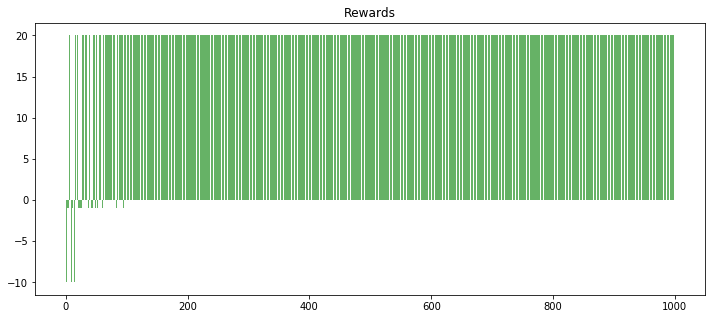

In [18]:
plt.figure(1,figsize=[12,5])
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.show()

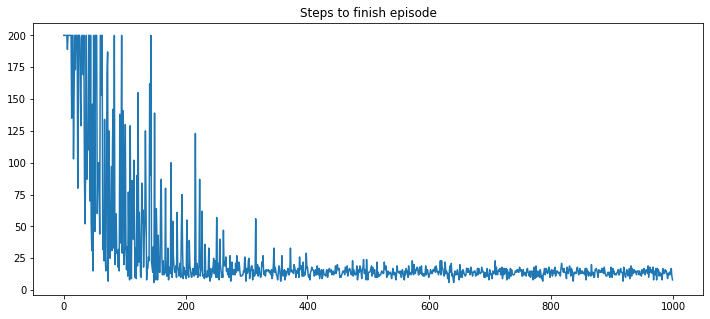

In [19]:
plt.figure(2,figsize=[12,5])
plt.title("Steps to finish episode")
plt.plot(steps_total)
plt.show()